In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, minimize, report_fit

In [2]:
def gauss(x, amp, cen, sigma):
    """Gaussian lineshape."""
    return amp * np.exp(-(x-cen)**2 / (2.*sigma**2))


def gauss_dataset(params, i, x):
    """Calculate Gaussian lineshape from parameters for data set."""
    amp = params['amp_%i' % (i+1)]
    cen = params['cen_%i' % (i+1)]
    sig = params['sig_%i' % (i+1)]
    return gauss(x, amp, cen, sig)


def objective(params, x, data):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - gauss_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

In [3]:
x = np.linspace(-1, 2, 151)
data = []
for _ in np.arange(5):
    params = Parameters()
    amp = 0.60 + 9.50*np.random.rand()
    cen = -0.20 + 1.20*np.random.rand()
    sig = 0.25 + 0.03*np.random.rand()
    dat = gauss(x, amp, cen, sig) + np.random.normal(size=x.size, scale=0.1)
    data.append(dat)
data = np.array(data)

In [4]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('cen_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

In [5]:
for iy in (2, 3, 4, 5):
    fit_params['sig_%i' % iy].expr = 'sig_1'

In [6]:
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

[[Variables]]
    amp_1:  5.59948247 +/- 0.02220393 (0.40%) (init = 0.5)
    cen_1:  0.50015185 +/- 0.00141375 (0.28%) (init = 0.4)
    sig_1:  0.26050062 +/- 5.2040e-04 (0.20%) (init = 0.3)
    amp_2:  8.25013297 +/- 0.02301393 (0.28%) (init = 0.5)
    cen_2:  0.61945837 +/- 9.5953e-04 (0.15%) (init = 0.4)
    sig_2:  0.26050062 +/- 5.2040e-04 (0.20%) == 'sig_1'
    amp_3:  1.58503984 +/- 0.02154621 (1.36%) (init = 0.5)
    cen_3: -0.02117012 +/- 0.00499436 (23.59%) (init = 0.4)
    sig_3:  0.26050062 +/- 5.2040e-04 (0.20%) == 'sig_1'
    amp_4:  7.40350167 +/- 0.02272485 (0.31%) (init = 0.5)
    cen_4:  0.88424882 +/- 0.00106926 (0.12%) (init = 0.4)
    sig_4:  0.26050062 +/- 5.2040e-04 (0.20%) == 'sig_1'
    amp_5:  8.64089165 +/- 0.02315653 (0.27%) (init = 0.5)
    cen_5: -0.09902412 +/- 9.1614e-04 (0.93%) (init = 0.4)
    sig_5:  0.26050062 +/- 5.2040e-04 (0.20%) == 'sig_1'
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_1, amp_5) = -0.373
    C(sig_1, amp_2) = -0

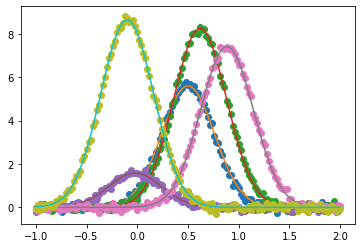

In [7]:
plt.figure()
for i in range(5):
    y_fit = gauss_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()

NExt try :(

In [10]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,5.1])
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])

In [11]:
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

In [12]:
def func(x, a, b, c):
    return a + b*x + c*x*x

In [14]:
import scipy.optimize as optimization

In [16]:
optimization.curve_fit(func, xdata, ydata, x0, sigma)

(array([0.1       , 0.88142857, 0.02142857]),
 array([[ 0.02753741, -0.0197551 ,  0.0029932 ],
        [-0.0197551 ,  0.02436463, -0.0044898 ],
        [ 0.0029932 , -0.0044898 ,  0.00089796]]))